<a href="https://colab.research.google.com/github/Abrar-2024/week3/blob/main/Copy_of_Clustering_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [110]:
data=pd.read_csv("/content/Traffic_Accidents.csv")

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [112]:
data.shape

(52000, 30)

In [113]:
data.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [114]:
data.sample(10)

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
41022,40381,200506B033332,387630.0,395240.0,-2.187753,53.453760,6,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01005198,2005.0
42000,80179,200520F029301,407320.0,287230.0,-1.893650,52.482914,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009191,2005.0
22435,34909,200505AW00921,333150.0,382920.0,-3.005475,53.338930,5,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01007146,2005.0
11328,46804,200506P040910,389820.0,414010.0,-2.155390,53.622521,6,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01005482,2005.0
27326,82592,200520H073502,398070.0,296700.0,-2.029918,52.568094,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01010263,2005.0
51293,44535,200506L029369,365400.0,399020.0,-2.522923,53.486740,6,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01006300,2005.0
9870,15240,200501RG40231,540660.0,178410.0,0.024525,51.487098,1,3,2.0,1,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01001666,2005.0
47576,88186,2.01E+12,396560.0,310380.0,-2.052342,52.691069,21,3,2.0,1,...,54.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01029366,2005.0
34093,67819,2.01E+12,414380.0,437490.0,-1.782983,53.833470,13,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,1.0,Yes,E01010788,2005.0
9823,51823,2.01E+12,392010.0,373120.0,-2.121229,53.255013,7,2,2.0,5,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,E01018627,2005.0


In [115]:
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,52000.0,NaN,NaN,NaN,52309.605596,30282.566278,0.0,25924.75,52285.5,78552.25,104949.0
Accident_Index,52000,38979,2.01E+12,13022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location_Easting_OSGR,52000.0,NaN,NaN,NaN,439654.064615,66711.811588,296780.0,388110.0,429505.0,516010.0,559570.0
Location_Northing_OSGR,52000.0,NaN,NaN,NaN,338794.330769,115731.113185,156110.0,194160.0,361950.0,415952.5,656390.0
Longitude,52000.0,NaN,NaN,NaN,-1.425829,0.975537,-3.596752,-2.179555,-1.552874,-0.312861,0.350177
Latitude,52000.0,NaN,NaN,NaN,52.940991,1.044812,51.28906,51.630849,53.14964,53.638514,55.80083
Police_Force,52000.0,NaN,NaN,NaN,11.101904,9.558172,1.0,1.0,10.0,20.0,48.0
Accident_Severity,52000.0,NaN,NaN,NaN,2.848481,0.39089,1.0,3.0,3.0,3.0,3.0
Number_of_Vehicles,51198.0,NaN,NaN,NaN,1.84306,0.708149,1.0,1.0,2.0,2.0,18.0
Number_of_Casualties,52000.0,NaN,NaN,NaN,1.358615,0.804162,1.0,1.0,1.0,1.0,23.0


In [116]:
data.duplicated().sum()

0

In [117]:
data.isna().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,802
Number_of_Casualties,0


In [118]:
data.dtypes

,0
Unnamed: 0,int64
Accident_Index,object
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,int64
Number_of_Vehicles,float64
Number_of_Casualties,int64


In [119]:
data.isnull().sum().sort_values(ascending=False)

,0
Speed_limit,1041
Number_of_Vehicles,802
Day_of_Week,537
LSOA_of_Accident_Location,41
Pedestrian_Crossing-Physical_Facilities,11
Pedestrian_Crossing-Human_Control,7
Time,2
1st_Road_Class,1
Road_Type,1
Did_Police_Officer_Attend_Scene_of_Accident,1


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [120]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

ct = ColumnTransformer(
    [("cat_imputer", SimpleImputer(strategy='most_frequent'), data.select_dtypes(include='object').columns),
     ("num_imputer", SimpleImputer(strategy='median'), data.select_dtypes(include='number').columns)])

transformed_data = pd.DataFrame(ct.fit_transform(data))

In [121]:
transformed_data.columns = data.columns.values

In [122]:
transformed_data.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0


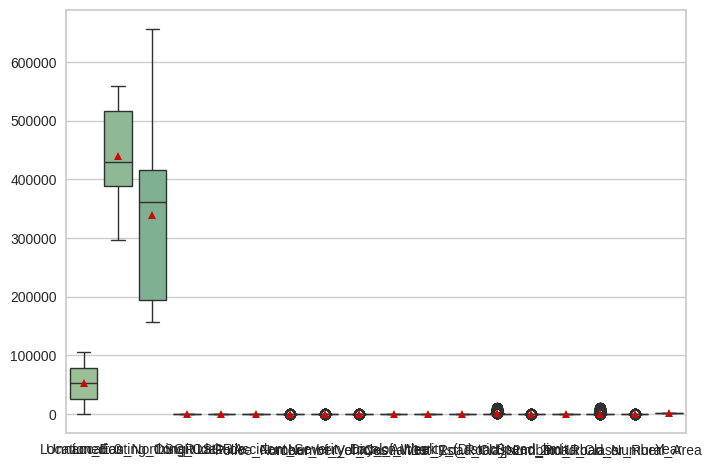

In [123]:
ax= sns.boxplot(data,showmeans=True, palette="crest")

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<Axes: xlabel='Latitude', ylabel='Did_Police_Officer_Attend_Scene_of_Accident'>

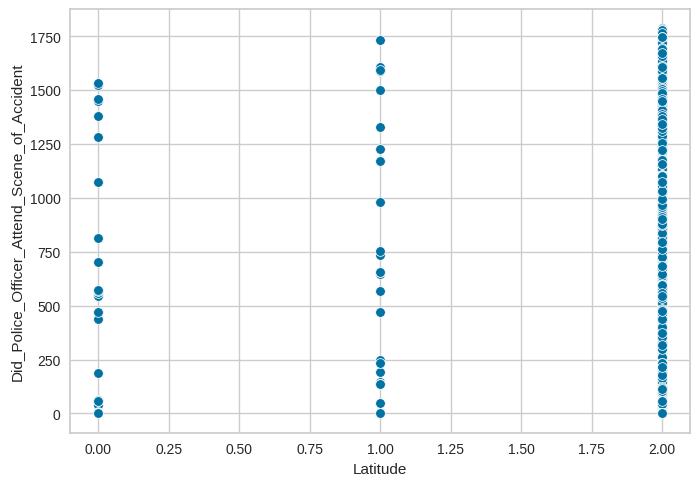

In [183]:
sns.scatterplot(data=data, x="Latitude", y="Did_Police_Officer_Attend_Scene_of_Accident")

<Axes: xlabel='Road_Type', ylabel='Longitude'>

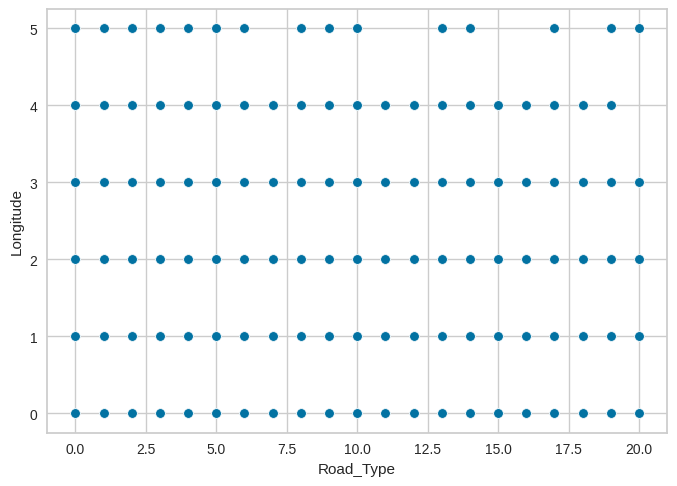

In [189]:
sns.scatterplot(data=data, x="Road_Type", y="Longitude")


<Axes: xlabel='Weather_Conditions', ylabel='Count'>

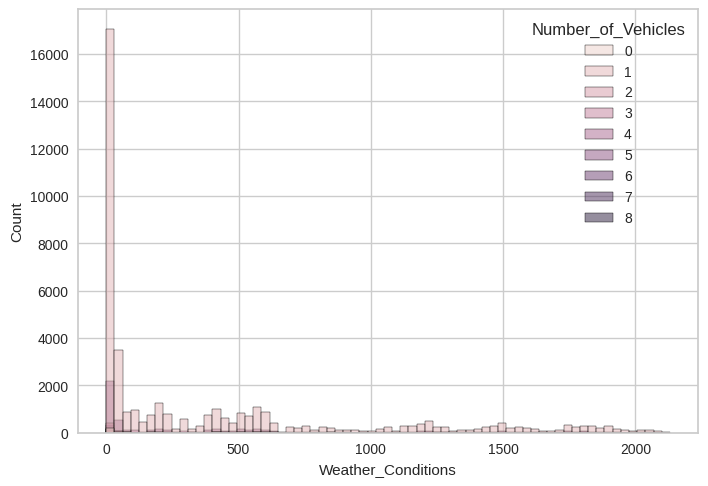

In [163]:
sns.histplot(data= data, x='Weather_Conditions', hue='Number_of_Vehicles')

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [125]:
x = transformed_data

In [126]:
x.isna().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0


In [142]:
from sklearn.preprocessing import LabelEncoder,RobustScaler


encoder = LabelEncoder()

for col in data.select_dtypes(include='object').columns:

  data[col] = pd.DataFrame(encoder.fit_transform(transformed_data[col]))


In [143]:
data = x

In [144]:
from sklearn.model_selection import train_test_split


x_train, x_test = train_test_split(x, test_size=0.2, random_state=42)

In [145]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Unnamed: 0                                   52000 non-null  int64
 1   Accident_Index                               52000 non-null  int64
 2   Location_Easting_OSGR                        52000 non-null  int64
 3   Location_Northing_OSGR                       52000 non-null  int64
 4   Longitude                                    52000 non-null  int64
 5   Latitude                                     52000 non-null  int64
 6   Police_Force                                 52000 non-null  int64
 7   Accident_Severity                            52000 non-null  int64
 8   Number_of_Vehicles                           52000 non-null  int64
 9   Number_of_Casualties                         52000 non-null  int64
 10  Date                  

In [146]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train_scaled =scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [147]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.9)

x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [148]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4)
km.fit(x_train_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [136]:
labels = km.labels_

## Evaluation
Evaluate the clustering result using appropriate metrics.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

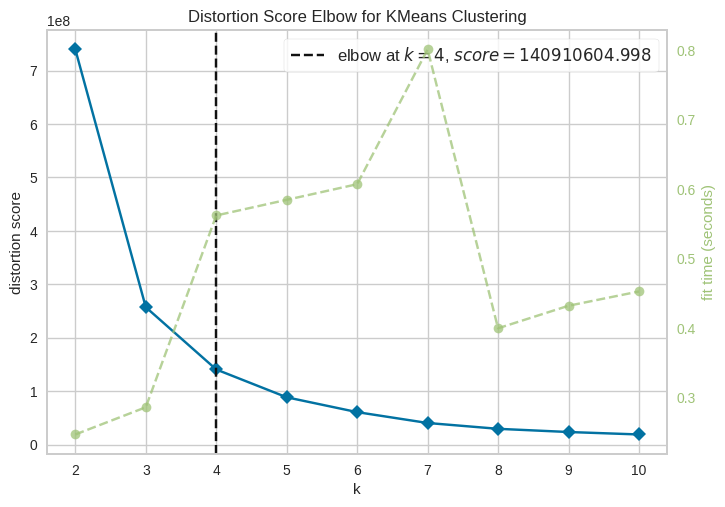

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [149]:

from yellowbrick.cluster import KElbowVisualizer


Elbow_M = KElbowVisualizer(KMeans(), k=10)


Elbow_M.fit(x_train_pca)

Elbow_M.show()

## Plot the data points with their predicted cluster center

<Axes: >

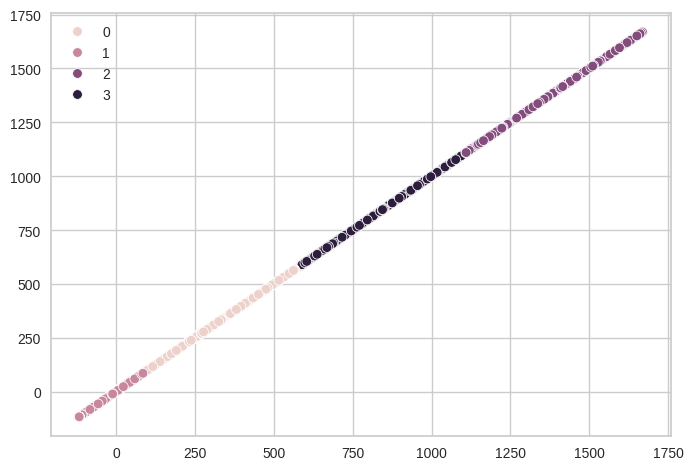

In [190]:
sns.scatterplot(x=x_train_pca[:,0], y=x_train_pca[:,0], hue=labels)

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?